In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functions import salinity,DM2D,rad2deg,O2freshtosal,range_check,correctDR,findProfiles

# Explore Glider Processing Steps

A notebook to test functions and get comfortable with the toolbox capabilities
- Do some basic processing
- Plot some things
- Showcase functions and capabilities

### Checking out the dead reckoning correction for Slocum glider based on `x_dr_state`

In [2]:
# Glider data set from Unit 334 collected in Placentia Bay in 2022
df = pd.read_csv('glider_334_data.csv')
#print(list(df.columns.values))

# convert from DDMM.MM to DD.DD
for col in ['lat', 'lon', 'gps_lat', 'gps_lon']:
    if(col in df.keys()):
        df[col] = DM2D(df[col])

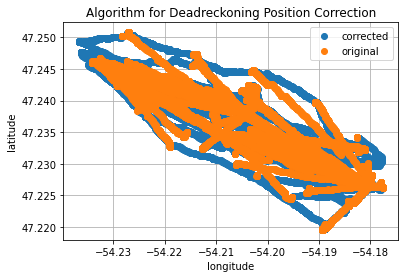

In [3]:
# Run the dead reckoning correction code
df['lon_corrected'],df['lat_corrected'] = correctDR(df['lon'],df['lat'],df['time'],df['dr_state'],df['gps_lon'],df['gps_lat'])

fig, ax = plt.subplots()
ax.plot(df['lon_corrected'],df['lat_corrected'],'o',label='corrected')
ax.plot(df['lon'],df['lat'],'o',label='original')
ax.set(xlabel='longitude', ylabel='latitude',
       title='Algorithm for Deadreckoning Position Correction')
ax.grid()
ax.legend()
fig.savefig("DRtest.png")
plt.show()


### Profile splitting code
This code splits the glider depth,time data to profiles and profile direction, which is useful for further post-processing

In [42]:
# initialize test data
depth = np.array([0.5,0.7,1,2,3,4,5,6,7,8,9,10,10,10,9,8,7,6,5,4,3,2,1.5,0.9,0])
stamp = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])

profile_index,profile_direction=findProfiles(stamp,depth,length=9,stall=0,shake=0)
print(profile_index,profile_direction)

{'length': 9, 'period': 0, 'inversion': 0, 'interrupt': 0, 'stall': 0, 'shake': 0}
[0.5 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.5 1.5 1.5 2.  2.  2.  2.
 2.  2.  2.  2.  2.  2.  2.5] [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. nan]


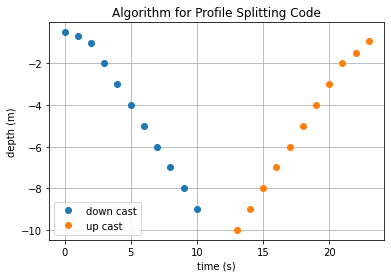

In [43]:
fig, ax = plt.subplots()
idx_down = np.argwhere(profile_direction==1)
idx_up = np.argwhere(profile_direction==-1)

ax.plot(stamp[idx_down],-depth[idx_down],'o',label='down cast')
ax.plot(stamp[idx_up],-depth[idx_up],'o',label='up cast')
ax.set(xlabel='time (s)', ylabel='depth (m)',
       title='Algorithm for Profile Splitting Code')
ax.grid()
ax.legend()
plt.show()